In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '../../astro-lightcurves-handler/save'
root_folder = '../../sne-lightcurves-synthetic/save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (../../sne-lightcurves-synthetic/save)
(0) - ../../sne-lightcurves-synthetic/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0_method-curvefit.splcds - 140.745[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (../../sne-lightcurves-synthetic/save)
(0) - ../../sne-lightcurves-synthetic/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0_method-curvefit.splcds - 140.745[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────


In [3]:
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = '../../astro-lightcurves-handler/save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.splcds'
filedir = '../../astro-lightcurves-handler/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0.splcds'
filedir = '../../sne-lightcurves-synthetic/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0_method-curvefit.splcds'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

> loading: ../../sne-lightcurves-synthetic/save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe_kfid-0_method-curvefit.splcds
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y', 'synthetic'])
LCDataset:
[raw - samples 2,047]
(*) obs_samples: 65,174 - min_len: 6 - max_dur: 538.8[days] - p50_dur: 52.9[days]
(g) obs_samples: 28,351 - min_len: 0 - max_dur: 538.8[days] - p50_dur: 38.9[days] - p50_cadence: 3.0[days]
(r) obs_samples: 36,823 - min_len: 0 - max_dur: 538.8[days] - p50_dur: 50.9[days] - p50_cadence: 3.0[days]
   |▏       | SLSN - 33/2,047 (1.61%)
   |█████▉  | SNIa - 1,534/2,047 (74.94%)
   |▍       | SNIbc - 103/2,047 (5.03%)
   |█▍      | allSNII - 377/2,047 (18.42%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[raw_train - samples 1,636]
(*) obs_samples: 51,337 - min_len: 6 - max_dur: 443.9[days] - p50_dur: 52.9[days]
(g) obs_samples: 22,

In [4]:
%load_ext autoreload
%autoreload 2
from lcfats.classifiers import get_fitted_classifiers, evaluate_classifiers

results = {}
test_lcset_name = 'val'
for train_lcset_name in ['train_curvefit', 'train']:
#for train_lcset_name in ['train']:
    classifier_dict, model_ids = get_fitted_classifiers(lcdataset, train_lcset_name)
    results[train_lcset_name] = evaluate_classifiers(lcdataset, test_lcset_name, classifier_dict, model_ids)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


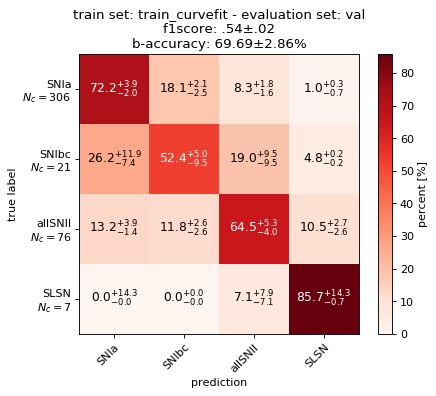

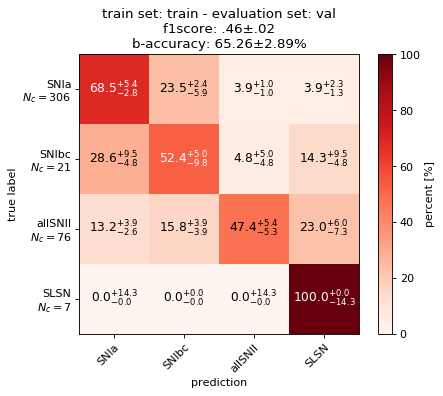

In [5]:
%load_ext autoreload
%autoreload 2
from flamingchoripan.cuteplots.cm_plots import plot_custom_confusion_matrix
from flamingchoripan.datascience.statistics import XError

new_order_classes = ['SNIa', 'SNIbc', 'allSNII', 'SLSN']
for train_lcset_name in ['train_curvefit', 'train']:
#for train_lcset_name in ['train']:
    d = results[train_lcset_name]
    lcset_name = d[model_ids[0]]['lcset_name']
    class_names = d[model_ids[0]]['class_names']
    cms = [d[id]['cm'][None] for id in model_ids]
    f1score_xe = XError([d[id]['f1score'] for id in model_ids])
    title = f'train set: {train_lcset_name} - evaluation set: {lcset_name}\n'
    title += f'f1score: {f1score_xe}'
    cm_kwargs = {
        'title':title,
        'figsize':(6,5),
    }
    plot_custom_confusion_matrix(np.concatenate(cms, axis=0), class_names, new_order_classes, **cm_kwargs)